# Perceptrons

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)] # petal length, width
y = (iris.target == 0).astype(np.int8) # iris setosa

per_clf = Perceptron()
per_clf.fit(X, y)

per_clf.predict([[2, 0.5]])

array([0], dtype=int8)

# Introduction to Keras and TensorFlow

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-08-09 13:57:20.237267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 13:57:20.459372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 13:57:20.460860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 13:57:21.337514: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
tf.__version__

'2.13.0'

## Classifier

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [16]:
class_names = ["T-shirt / Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]

'Coat'

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.layers

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

In [37]:
weights_biases = model.get_weights()
weights = weights_biases[0]
biases = weights_biases[1]

weights.shape

(784, 300)

In [38]:
biases.shape

(300,)

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2023-08-07 15:28:59.848449: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7126 - accuracy: 0.7653 - val_loss: 0.5021 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4883 - accuracy: 0.8293 - val_loss: 0.4401 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4428 - accuracy: 0.8443 - val_loss: 0.4303 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4152 - accuracy: 0.8541 - val_loss: 0.3917 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3939 - accuracy: 0.8607 - val_loss: 0.3939 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8657 - val_loss: 0.3808 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3649 - accuracy: 0.8707 - val_loss: 0.3676 - val_accuracy: 0.8706
Epo

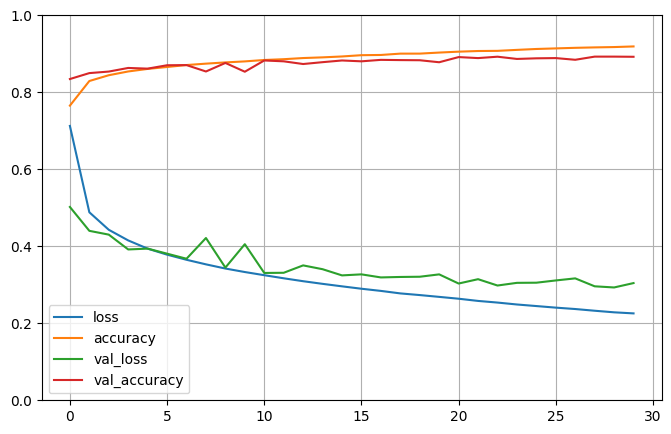

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 942us/step - loss: 65.2512 - accuracy: 0.8487


[65.25121307373047, 0.8486999869346619]

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 50ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
y_pred = [np.argmax(predict) for predict in model.predict(X_new)]

1/1 [==============================] - 0s 15ms/step


In [55]:
y_pred

[9, 2, 1]

In [56]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U13')

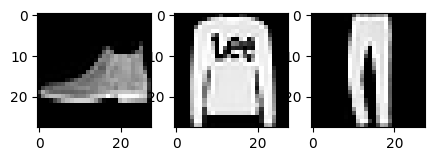

In [66]:
plt.figure(figsize=(5, 8))

for index, fashion in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(fashion, cmap='gray')

## Regression

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_squared_error, optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

2023-08-08 12:36:11.757676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-08 12:36:11.776135: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9461 - val_loss: 0.5564
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5444 - val_loss: 0.4970
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5064 - val_loss: 0.4692
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4902 - val_loss: 0.4602
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5192 - val_loss: 0.4491
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4691 - val_loss: 0.4378
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4597 - val_loss: 0.4349
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4518 - val_loss: 0.4235
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4426 - val_loss: 0.4149
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4376 - val_loss: 0.4107

In [4]:
y_pred

array([[2.5859733 ],
       [0.66124105],
       [1.554139  ]], dtype=float32)

In [5]:
y_train[:3]

array([1.63 , 0.559, 0.479])

## Keras Functional API

In [6]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

Subsets of features can be sent down the wide path and the deep path

In [11]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [16]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [17]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data= ((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.4999 - val_loss: 0.9716
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8163 - val_loss: 0.7104
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6781 - val_loss: 0.6401
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6289 - val_loss: 0.6003
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5997 - val_loss: 0.5750
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5793 - val_loss: 0.5561
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5647 - val_loss: 0.5411
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5523 - val_loss: 0.5287
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5417 - val_loss: 0.5179
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5333 - val_loss: 0.5088

In [18]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4739


In [24]:
y_pred = model.predict((X_new_A, X_new_B))
print(y_pred, y_test[:3])

1/1 [==============================] - 0s 26ms/step
[[2.7017856]
 [0.5014328]
 [1.7203107]] [2.655 0.809 1.546]


## Subclassing API for Dynamic Models

In [26]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [27]:
model = WideAndDeepModel()

## To save a model, use save function with a .h5 file

## To load a model, use the load_model function from the models module

## Checkpoints during training

In [42]:
input_= keras.layers.Input(shape=X_train.shape[1:], name="wide_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = keras.layers.Dense(1, name="output")(hidden2)

model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mse", optimizer="sgd")
checkpoints = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoints])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6918 - val_loss: 0.4600
Epoch 2/10
 91/363 [======>.......................] - ETA: 0s - loss: 0.4193

/home/mihnea/personal/ai/env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 2ms/step - loss: 0.4350 - val_loss: 1.1050
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3929 - val_loss: 0.9814
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3725 - val_loss: 0.5297
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3602 - val_loss: 0.3804
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3546 - val_loss: 0.3664
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3464 - val_loss: 0.4706
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3424 - val_loss: 0.5116
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3386 - val_loss: 0.6367
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3339 - val_loss: 1.8858


In [43]:
model = keras.models.load_model("my_model.h5")

In [44]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs = 50, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoints, early_stopping])

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3464 - val_loss: 0.3780
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3399 - val_loss: 0.6686
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3409 - val_loss: 0.3537
Epoch 4/50
 94/363 [======>.......................] - ETA: 0s - loss: 0.3349

/home/mihnea/personal/ai/env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 2ms/step - loss: 0.3301 - val_loss: 0.3891
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3282 - val_loss: 0.3717
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3237 - val_loss: 0.3488
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3248 - val_loss: 0.4463
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3185 - val_loss: 0.3371
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3184 - val_loss: 0.3532
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3142 - val_loss: 0.5904
Epoch 11/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3092 - val_loss: 0.4954
Epoch 12/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3077 - val_loss: 0.8719
Epoch 13/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3084 - val_loss: 0.4791
Epoch 1

In [46]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## TensorBoard

In [18]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    log_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, log_id)

run_logdir = get_run_logdir()

In [49]:
tensorboard = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2905 - val_loss: 0.7888
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2916 - val_loss: 0.3120
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2929 - val_loss: 0.3193
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2881 - val_loss: 0.7845
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2852 - val_loss: 1.1148
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2895 - val_loss: 0.9063
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2882 - val_loss: 0.3038
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2846 - val_loss: 0.3181
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2846 - val_loss: 0.3532
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2963 - val_loss: 0.4518

## Choosing Hyperparameters

In [62]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

In [79]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, learning_rate=3e-3, n_hidden=1, n_neurons=30)

In [68]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9761 - val_loss: 1.2485
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5516 - val_loss: 1.3016
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4978 - val_loss: 1.1906
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4623 - val_loss: 1.1181
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.8441
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4255 - val_loss: 0.5777
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4177 - val_loss: 0.5389
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4092 - val_loss: 0.8555
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3997 - val_loss: 0.5453
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3959 - val_lo

KerasRegressor(
	model=<function build_model at 0x7f06543de830>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [69]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step


In [71]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 24ms/step


In [84]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1],
    "n_neurons": [30, 50],
    "learning_rate": [0.01, 0.001]
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=1, cv=3)

In [86]:
rnd_search_cv.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
242/242 [==============================] - 1s 3ms/step - loss: 0.8122 - val_loss: 0.5352
Epoch 2/30
242/242 [==============================] - 1s 2ms/step - loss: 0.4512 - val_loss: 0.4611
Epoch 3/30
242/242 [==============================] - 1s 2ms/step - loss: 0.4188 - val_loss: 0.6168
Epoch 4/30
242/242 [==============================] - 1s 2ms/step - loss: 0.4011 - val_loss: 0.5106
Epoch 5/30
242/242 [==============================] - 1s 2ms/step - loss: 0.3916 - val_loss: 0.5700
Epoch 6/30
242/242 [==============================] - 1s 2ms/step - loss: 0.3831 - val_loss: 0.4068
Epoch 7/30
242/242 [==============================] - 1s 2ms/step - loss: 0.3783 - val_loss: 0.8079
Epoch 8/30
242/242 [==============================] - 1s 2ms/step - loss: 0.3740 - val_loss: 0.9071
Epoch 9/30
242/242 [==============================] - 1s 2ms/step - loss: 0.3740 - val_loss: 0.5962
Epoch 10/30
242/242 [==============================] - 1s 2ms/step - loss: 0.3683 - val_loss: 0.7383

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(learning_rate=0.003, model=<function build_model at 0x7f06543de830>, n_hidden=1, n_neurons=30),
                   n_iter=1,
                   param_distributions={'learning_rate': [0.01, 0.001],
                                        'n_hidden': [0, 1],
                                        'n_neurons': [30, 50]})

In [88]:
rnd_search_cv.best_params_

{'n_neurons': 30, 'n_hidden': 1, 'learning_rate': 0.01}

In [89]:
best_model = rnd_search_cv.best_estimator_.model_

# Exercise - MNIST

In [3]:
mnist = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [41]:
from sklearn.model_selection import train_test_split

(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [42]:
run_logdir = get_run_logdir()
tensorboard = keras.callbacks.TensorBoard(run_logdir)

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation = keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [72]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [73]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

ExpLR = ExponentialLearningRate(factor=1.005)

In [74]:
history = model.fit(X_train, y_train, epochs=1,
          validation_data=(X_valid, y_valid), callbacks=[ExpLR])

1407/1407 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.4033 - val_loss: nan - val_accuracy: 0.0987


0.017779640853405

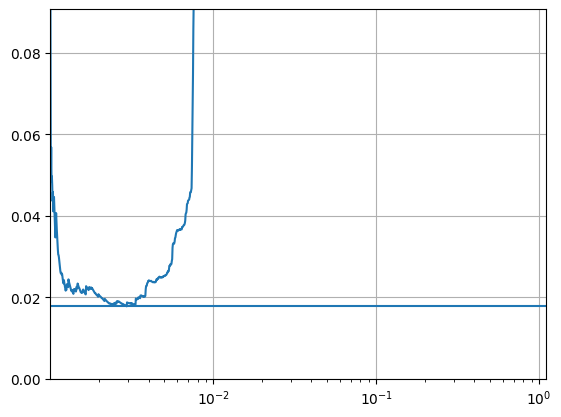

In [93]:
plt.plot(ExpLR.rates, ExpLR.losses)
plt.grid()
plt.gca().set_xscale('log')
plt.hlines(min(ExpLR.losses), min(ExpLR.rates), max(ExpLR.rates))
plt.axis([min(ExpLR.rates), max(ExpLR.rates), 0, ExpLR.losses[0]])

min(ExpLR.losses)

In [81]:
keras.backend.clear_session()

In [82]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation = keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [94]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=0.017),
              metrics=["accuracy"])

In [95]:
run_id = 1
run_logdir = os.path.join(os.curdir, "mnist_logs", "run_{:03d}".format(run_id))
run_logdir

'./mnist_logs/run_001'

In [96]:
early_stopping = keras.callbacks.EarlyStopping(patience=20)
checkpoint = keras.callbacks.ModelCheckpoint("mnist_model.h5", save_best_only=True)
tensorboard = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping, checkpoint, tensorboard])

Epoch 1/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3737 - val_accuracy: 0.1103
Epoch 2/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3737 - val_accuracy: 0.1103
Epoch 3/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3736 - val_accuracy: 0.1103
Epoch 4/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3738 - val_accuracy: 0.1103
Epoch 5/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3739 - val_accuracy: 0.1103
Epoch 6/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3736 - val_accuracy: 0.1103
Epoch 7/100
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1131 - val_loss: 2.3736 - val_ac

KeyboardInterrupt: 